In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import spearmanr
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
import statsmodels.api as sm

In [2]:
df_18 = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\Saved Outputs\\True-18-19.csv')
df_19 = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\Saved Outputs\\Merged-Filtered-19-20.csv')
df_20 = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\Saved Outputs\\True-20-21.csv')
df = pd.concat([df_18, df_20, df_19], axis=0)
df = df.drop(columns=['Name', 'Age', 'Barangay', 'School', 'Strand','PassCheck'])
df['Contemporary Arts'] = df['Contemporary Philippine Arts from the Regions'].fillna(df['Contemporary Arts from the Regions & the World'])
df = df.drop(columns=['Contemporary Philippine Arts from the Regions','Contemporary Arts from the Regions & the World'])
df['Disciplines in Social Sciences'] = df['Discipline and Ideas in Applied Sciences'].fillna(df['Discipline and Ideas in Social Sciences'])
df['Disciplines in Social Sciences'] = df['Disciplines in Social Sciences'].fillna(df['Discipline and Ideas in Social Science'])
df['Disciplines in Social Sciences'] = df['Disciplines in Social Sciences'].fillna(df['Discipline and Ideas in the Social Sciences'])
df['Disciplines in Social Sciences'] = df['Disciplines in Social Sciences'].fillna(df['Discipline and Ideas in the Applied Social Science'])
df = df.drop(columns=['Discipline and Ideas in Applied Sciences','Discipline and Ideas in Social Sciences','Discipline and Ideas in Social Science','Discipline and Ideas in the Social Sciences','Discipline and Ideas in the Applied Social Science'])
column_names = ['raw1','raw2', 'raw3', 'raw4', 'raw5']
df['Total Raw Score'] = df[column_names].sum(axis=1)

In [3]:
score = 'raw4'
subject = ['Understanding Culture, Society, And Politics']
k = 10
filter_outliers = False
scale = False
# dataframe = np.array([score,subject[0]],dtype=object)
# #'21st Century Literature from the Philippines and the World'
# #'General Chemistry 2'
# #'Research in Daily Life 2'
# #'Inquiries, Investigation, & Immersion'
# #'Intro to Philosophy and the Human Person'
# #'Work Immersion'

In [4]:
# linear_df = df[[dataframe[i] for i in range(len(dataframe))]]
linear_df = pd.DataFrame()
for i in subject:
    linear_df[i] = df[i]
#linear_df['schname'] = df['schname']
#linear_df = pd.get_dummies(linear_df, columns=["schname"])
linear_df[score] = df[score]
if filter_outliers:
    # Check Outlier Data Using IQR
    Q1=linear_df[subject[0]].quantile(0.25)
    Q3=linear_df[subject[0]].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    # Drop Outlier Data
    linear_df = linear_df[linear_df[subject[0]] > Lower_Whisker]
    linear_df = linear_df[linear_df[subject[0]] < Upper_Whisker]

linear_df = linear_df.dropna()

x = linear_df.drop(score, axis=1)
y = linear_df[[score]]

if scale:
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    x[subject] = sc_X.fit_transform(x)
    y[score] = sc_y.fit_transform(y)

#linear_df[subject[0]],parameters = stats.boxcox(linear_df[subject[0]]) #Boxcox
#linear_df[score],parameters = stats.boxcox(linear_df[score]) #Boxcox
# scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) ## Normalization
# d = scaler.fit_transform(linear_df[subject[0]].values.reshape(-1,1))
# tempFrame = pd.DataFrame(d, columns=[subject[0]])
# linear_df[subject[0]] = tempFrame[subject[0]]

# d = scaler.fit_transform(linear_df[score].values.reshape(-1,1))
# tempFrame = pd.DataFrame(d, columns=[score])
# linear_df[score] = tempFrame[score] ##


#linear_df[subject[0]] = np.sqrt(linear_df[subject[0]]) #Sqrt Transformation


x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)
cv = KFold(n_splits=k, random_state=1, shuffle=True)

linear_df

,"Understanding Culture, Society, And Politics",raw4
0,93.0,11
2,90.0,19
3,82.0,20
4,86.0,18
6,99.0,20
...,...,...
204,83.0,18
205,92.0,10
208,90.0,15
209,96.0,22


Model Score:  0.09684900007026898
R2 Score:  0.09684900007026898
Mean Squared Error:  25.31725488967392
Root Mean Squared Error:  5.031625471919976
Accuracy: 3.869 (0.439)


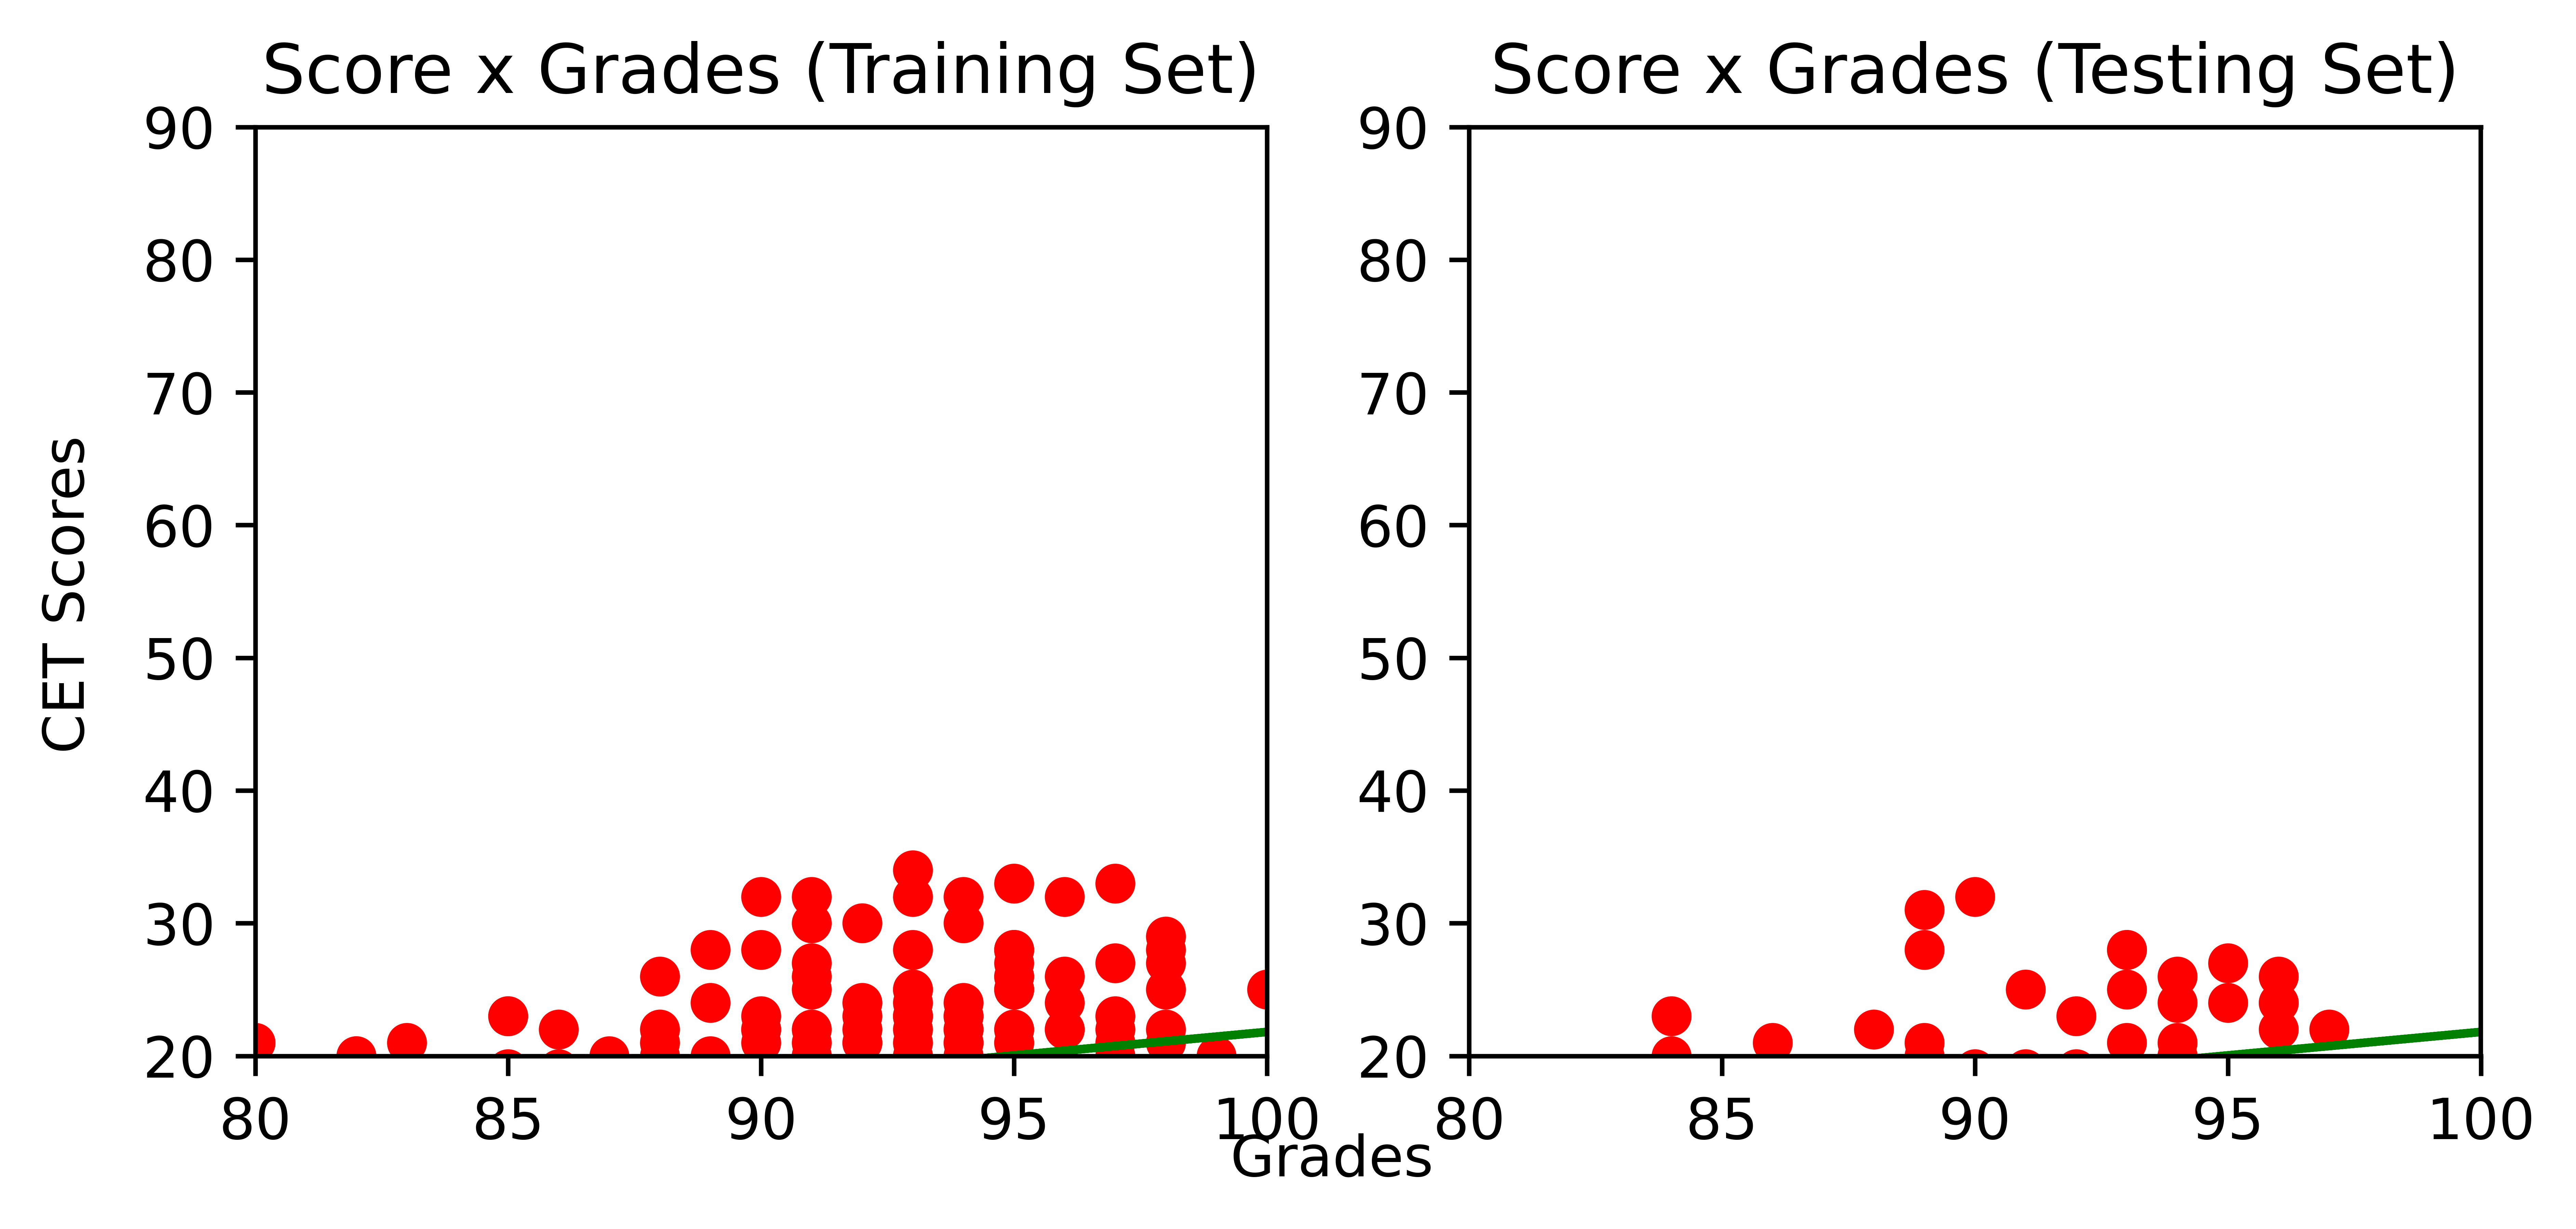

In [5]:
linearModel = LinearRegression() #Automate Alpha Set
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)
residuals = y_test - linearPredictions

Model_score = linearModel.score(x_test,y_test)
R2_score = r2_score(y_test,linearPredictions) #Same as Model_Score
Mean_sqrd_err = mean_squared_error(y_test,linearPredictions)
Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test,linearPredictions))
print('Model Score: ', Model_score)
print('R2 Score: ', R2_score)
print('Mean Squared Error: ', Mean_sqrd_err)
print('Root Mean Squared Error: ', Root_mn_sqrd_err)

# create model
model = linearModel
# evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(absolute(scores)), std(scores)))

fig, axes = plt.subplots(1,2,figsize=(7,3),dpi=1200)
fig.title = subject
# Set common labels
fig.text(0.5, 0.04, 'Grades', ha='center', va='center')
fig.text(0.06, 0.5, 'CET Scores', ha='center', va='center', rotation='vertical')
ax1, ax2 = axes.flatten()

ax1.scatter(x_train, y_train, color = "red")
ax1.plot(x_train, linearModel.predict(x_train), color = "green")
ax1.set_title("Score x Grades (Training Set)")
ax1.set_xlim(left=80, right=100)
ax1.set_ylim(bottom=20, top=90)

ax2.scatter(x_test, y_test, color = "red")
ax2.plot(x_train, linearModel.predict(x_train), color = "green")
ax2.set_title("Score x Grades (Testing Set)")
ax2.set_xlim(left=80, right=100)
ax2.set_ylim(bottom=20, top=90)

plt.show()

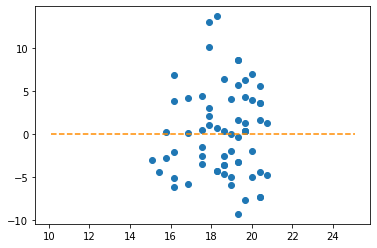

C:\Users\Zulu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


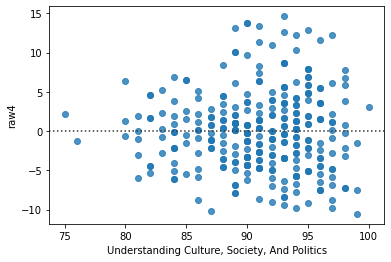

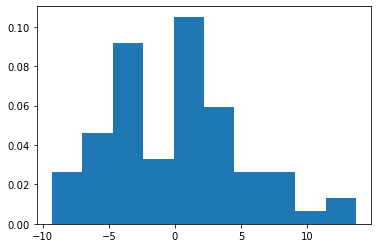

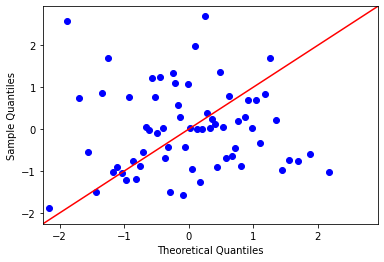

In [6]:
plt.scatter(linearPredictions,residuals)
y_grid = np.arange((min(linearPredictions)-5),(max(linearPredictions)+5),1)
residual_grid = [0 for i in range(len(y_grid))]
plt.plot(y_grid, residual_grid,color='darkorange', linestyle='--')
plt.show()

sns.residplot(x,y)
plt.show()

plt.hist(residuals,density=True)
plt.show()

sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

Model Score:  0.03444614401403856
R2 Score:  0.03444614401403856
Mean Squared Error:  27.066540460682685
Root Mean Squared Error:  5.202551341474939
Accuracy: 4.007 (0.523)


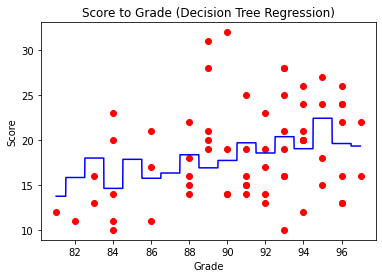

In [7]:
treeregressor = DecisionTreeRegressor(random_state = 0)
treeregressor.fit(x_train, y_train)
X_grid = np.arange(min(x_test.values), max(x_test.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

#plt.scatter(x_train, y_train, color = 'green')
plt.scatter(x_test, y_test, color = 'red')
plt.plot(X_grid, treeregressor.predict(X_grid), color = 'blue')
plt.title('Score to Grade (Decision Tree Regression)')   
plt.xlabel('Grade')  
plt.ylabel('Score')  

treePredictions = treeregressor.predict(x_test)
residuals = y_test - treePredictions.reshape(-1,1)
Model_score = treeregressor.score(x_test,y_test)
R2_score = r2_score(y_test,treePredictions) #Same as Model_Score
Mean_sqrd_err = mean_squared_error(y_test,treePredictions)
Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test,treePredictions))
print('Model Score: ', Model_score)
print('R2 Score: ', R2_score)
print('Mean Squared Error: ', Mean_sqrd_err)
print('Root Mean Squared Error: ', Root_mn_sqrd_err)

# create model
model = treeregressor
# evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(absolute(scores)), std(scores)))

export_graphviz(treeregressor, out_file ='decisiontree.dot',feature_names = ['Grades']) 
plt.show()

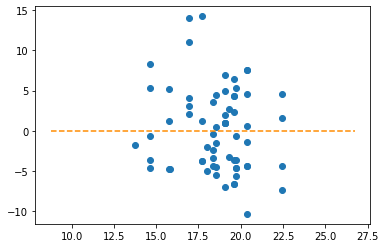

C:\Users\Zulu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


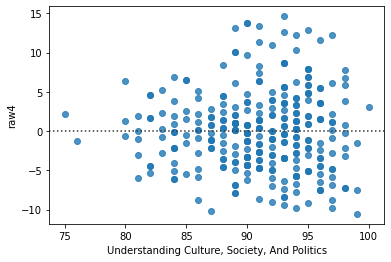

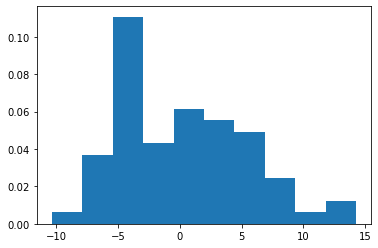

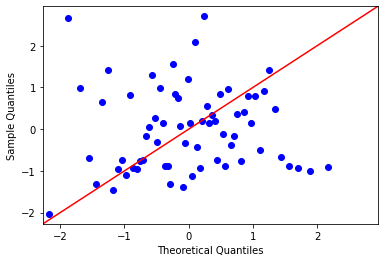

In [8]:
plt.scatter(treePredictions,residuals)
y_grid = np.arange((min(treePredictions)-5),(max(treePredictions)+5),1)
residual_grid = [0 for i in range(len(y_grid))]
plt.plot(y_grid, residual_grid,color='darkorange', linestyle='--')
plt.show()

sns.residplot(x,y)
plt.show()

plt.hist(residuals,density=True)
plt.show()

sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

<ipython-input-9-5abc57dc56fd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forestregressor.fit(x_train, y_train)


Model Score:  0.03979402096279061
R2 Score:  0.03979402096279061
Mean Squared Error:  26.916628027611466
Root Mean Squared Error:  5.188123748293931
Accuracy: 4.012 (0.516)


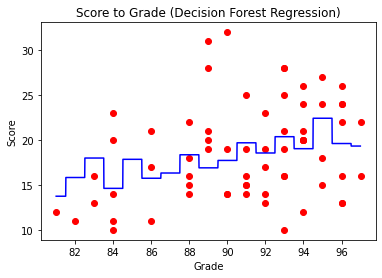

In [9]:
forestregressor = RandomForestRegressor(random_state = 0)
forestregressor.fit(x_train, y_train)
X_grid = np.arange(min(x_test.values), max(x_test.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

#plt.scatter(x_train, y_train, color = 'green')
plt.scatter(x_test, y_test, color = 'red')
plt.plot(X_grid, treeregressor.predict(X_grid), color = 'blue')
plt.title('Score to Grade (Decision Forest Regression)')   
plt.xlabel('Grade')  
plt.ylabel('Score')  

forestPredictions = forestregressor.predict(x_test)
residuals = y_test - forestPredictions.reshape(-1,1)
Model_score = forestregressor.score(x_test,y_test)
R2_score = r2_score(y_test,forestPredictions) #Same as Model_Score
Mean_sqrd_err = mean_squared_error(y_test,forestPredictions)
Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test,forestPredictions))
print('Model Score: ', Model_score)
print('R2 Score: ', R2_score)
print('Mean Squared Error: ', Mean_sqrd_err)
print('Root Mean Squared Error: ', Root_mn_sqrd_err)

# create model
model = forestregressor
# evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(absolute(scores)), std(scores)))

#export_graphviz(forestregressor, out_file ='forest.dot',feature_names = ['Grades']) 
plt.show()

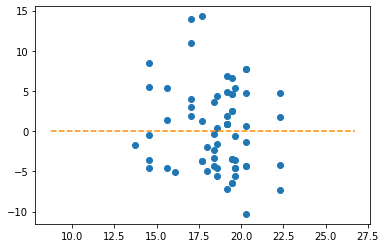

C:\Users\Zulu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


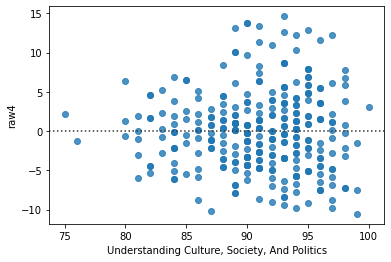

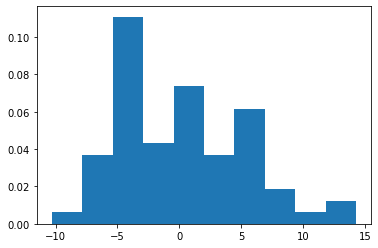

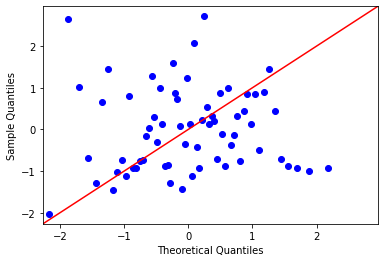

In [10]:
plt.scatter(forestPredictions,residuals)
y_grid = np.arange((min(forestPredictions)-5),(max(forestPredictions)+5),1)
residual_grid = [0 for i in range(len(y_grid))]
plt.plot(y_grid, residual_grid,color='darkorange', linestyle='--')
plt.show()

sns.residplot(x,y)
plt.show()

plt.hist(residuals,density=True)
plt.show()

sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [11]:
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(x_train[predictors],y_train)
    regPredictions = ridgereg.predict(x_test)
    y_pred = ridgereg.predict(x_train[predictors].sort_values(by=['x']))
    score = ridgereg.score(x_test,y_test)
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(x_train['x'].sort_values(),y_pred) #Prediction Line
        plt.plot(x_test['x'],y_test,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    # create model
    model = ridgereg
    # evaluate model
    scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

    #Return the result in pre-defined format
    rss = sum((y_pred-y_train)**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)

    R2_score = r2_score(y_test,regPredictions) #Same as Model_Score
    Mean_sqrd_err = mean_squared_error(y_test,regPredictions)
    Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test,regPredictions))
    print('Model Score: ', Model_score)
    print('R2 Score: ', R2_score)
    print('Mean Squared Error: ', Mean_sqrd_err)
    print('Root Mean Squared Error: ', Root_mn_sqrd_err)

    return scores, alpha, score, ret

def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True,max_iter = 1000000)
    lassoreg.fit(x_train[predictors],y_train)
    lassoPredictions = lassoreg.predict(x_test)
    y_pred = lassoreg.predict(x_train[predictors].sort_values(by=['x']))
    score = lassoreg.score(x_test,y_test)
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(x_train['x'].sort_values(),y_pred) #Prediction Line
        plt.plot(x_test['x'],y_test,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    # create model  
    model = lassoreg
    # evaluate model
    scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

    #Return the result in pre-defined format
    rss = sum((y_pred-y_train)**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)

    R2_score = r2_score(y_test,lassoPredictions) #Same as Model_Score
    Mean_sqrd_err = mean_squared_error(y_test,lassoPredictions)
    Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test,lassoPredictions))
    print('Model Score: ', Model_score)
    print('R2 Score: ', R2_score)
    print('Mean Squared Error: ', Mean_sqrd_err)
    print('Root Mean Squared Error: ', Root_mn_sqrd_err)

    return scores, alpha, score, ret

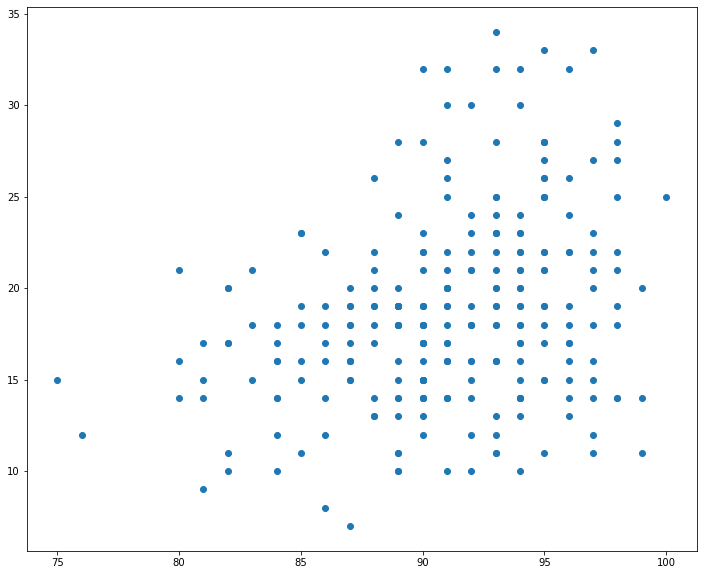

In [12]:
#Importing libraries. The same will be used throughout the article.
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10
numPow = 16 # 3|5|16 is best, 3 @ 0.0001:0.187, 16 @ 1:0.176
#Define input array with angles from 60deg to 300deg converted to radians
#x = np.array([i*np.pi/180 for i in range(60,300,4)])
#np.random.seed(10)  #Setting seed for reproducibility
#y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
for i in range(2,numPow):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
    
x_train, x_test, y_train, y_test = train_test_split(data.drop('y',axis=1),data['y'], test_size=0.2, random_state=0)

plt.scatter(x_train['x'],y_train)

Model Score:  0.03979402096279061
R2 Score:  0.08361257533149535
Mean Squared Error:  25.68830019545954
Root Mean Squared Error:  5.068362674025956
1e-15 0.08361257533149535
Accuracy: 3.869 (0.439)
Model Score:  0.03979402096279061
R2 Score:  0.08446245929154361
Mean Squared Error:  25.66447612966671
Root Mean Squared Error:  5.066011856447506
1e-10 0.08446245929154361
Accuracy: 3.869 (0.439)
Model Score:  0.03979402096279061
R2 Score:  0.087411452498254
Mean Squared Error:  25.581809540482826
Root Mean Squared Error:  5.057846334210128
1e-08 0.087411452498254
Accuracy: 3.869 (0.439)
Model Score:  0.03979402096279061
R2 Score:  0.09739497480696813
Mean Squared Error:  25.30195004964893
Root Mean Squared Error:  5.030104377609766
0.0001 0.09739497480696813
Accuracy: 3.869 (0.439)
Model Score:  0.03979402096279061
R2 Score:  0.09990904180506821
Mean Squared Error:  25.231475372650763
Root Mean Squared Error:  5.023094203043654
0.001 0.09990904180506821
Accuracy: 3.869 (0.439)
Model Score

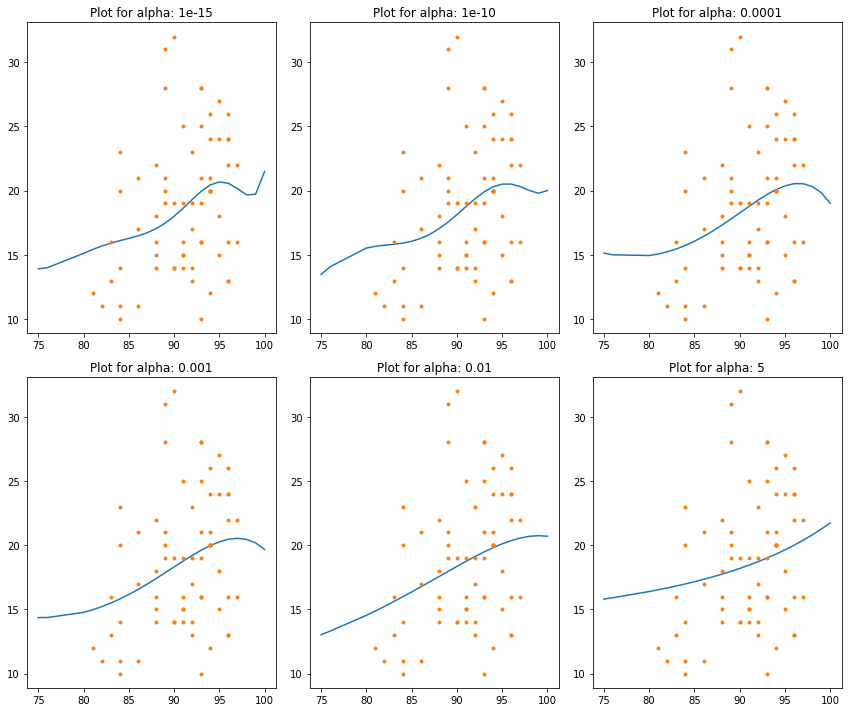

In [13]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,numPow)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,numPow)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    scores, alpha, score, coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)
    print(alpha, score)
    print('Accuracy: %.3f (%.3f)' % (mean(absolute(scores)), std(scores)))

C:\Users\Zulu\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3160.0576438097587, tolerance: 0.7051030303030303
  model = cd_fast.enet_coordinate_descent(


Model Score:  0.03979402096279061
R2 Score:  0.0916956274933648
Mean Squared Error:  25.461714949045042
Root Mean Squared Error:  5.045960260351348
1e-15 0.0916956274933648
Accuracy: 3.869 (0.439)


C:\Users\Zulu\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3159.6286409365866, tolerance: 0.7051030303030303
  model = cd_fast.enet_coordinate_descent(


Model Score:  0.03979402096279061
R2 Score:  0.09169563465848707
Mean Squared Error:  25.461714748191337
Root Mean Squared Error:  5.045960240448921
1e-10 0.09169563465848707
Accuracy: 3.869 (0.439)


C:\Users\Zulu\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3117.0821304928095, tolerance: 0.7051030303030303
  model = cd_fast.enet_coordinate_descent(


Model Score:  0.03979402096279061
R2 Score:  0.09169634389073211
Mean Squared Error:  25.46169486689405
Root Mean Squared Error:  5.045958270427338
1e-08 0.09169634389073211
Accuracy: 3.869 (0.439)
Model Score:  0.03979402096279061
R2 Score:  0.09936883027350285
Mean Squared Error:  25.246618657705028
Root Mean Squared Error:  5.024601343161965
0.0001 0.09936883027350285
Accuracy: 3.869 (0.439)
Model Score:  0.03979402096279061
R2 Score:  0.10013703771411187
Mean Squared Error:  25.225084159505332
Root Mean Squared Error:  5.022457979864574
0.001 0.10013703771411187
Accuracy: 3.869 (0.439)
Model Score:  0.03979402096279061
R2 Score:  0.09381154923694279
Mean Squared Error:  25.4024011353938
Root Mean Squared Error:  5.040079477090991
0.01 0.09381154923694279
Accuracy: 3.872 (0.431)
Model Score:  0.03979402096279061
R2 Score:  -0.0008189471615291932
Mean Squared Error:  28.055096418732784
Root Mean Squared Error:  5.296706185803852
1 -0.0008189471615291932
Accuracy: 4.095 (0.468)
Model 

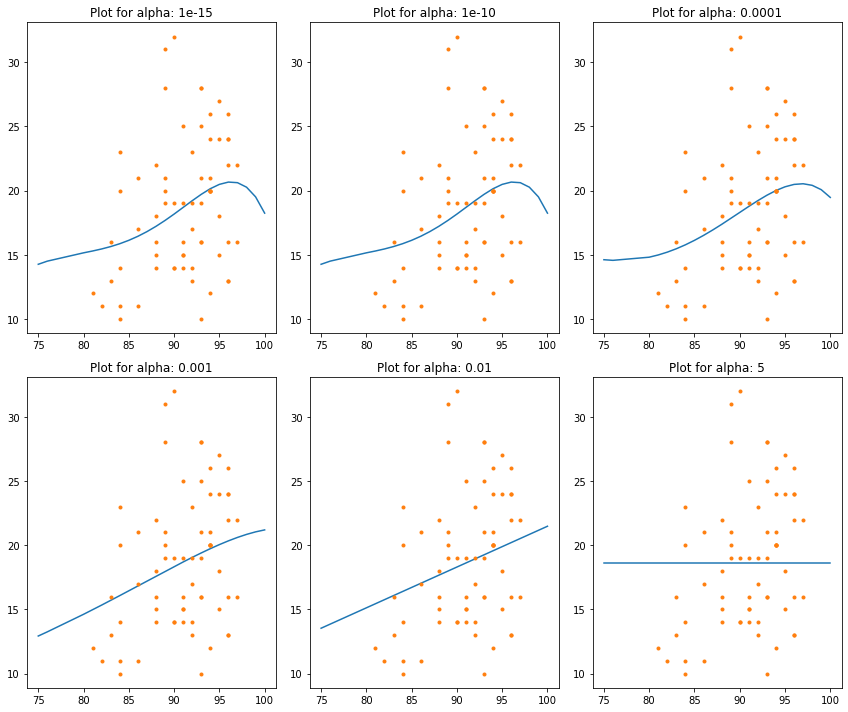

In [14]:
for i in range(10):
    scores, alpha, score, coef_matrix_ridge.iloc[i,] = lasso_regression(data, predictors, alpha_ridge[i], models_to_plot)
    print(alpha, score)
    print('Accuracy: %.3f (%.3f)' % (mean(absolute(scores)), std(scores)))

Model Score:  0.03444614401403856
R2 Score:  0.03444614401403856
Mean Squared Error:  27.066540460682685
Root Mean Squared Error:  5.202551341474939
Accuracy: 4.007 (0.523)


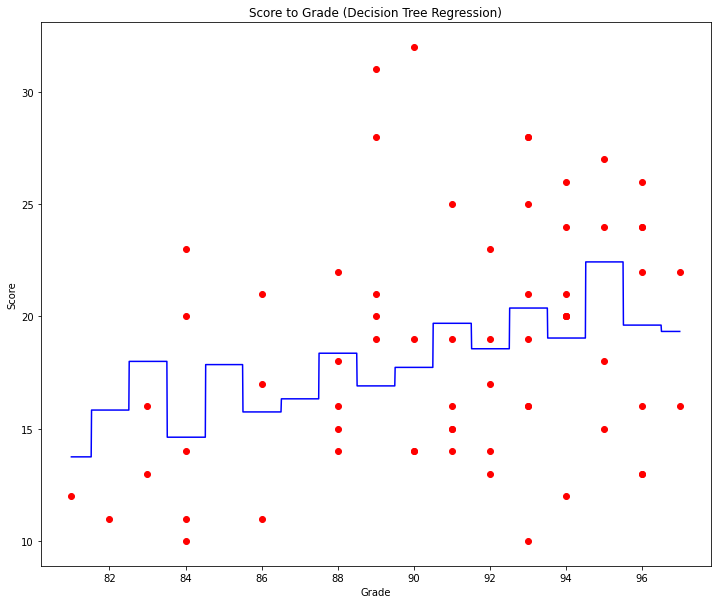

In [15]:
treeregressor = DecisionTreeRegressor(random_state = 0)
treeregressor.fit(x_train, y_train)
X_grid = pd.DataFrame()
X_grid['x'] = np.arange(min(x_test['x']), max(x_test['x']), 0.01)
for i in range(2,numPow):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    X_grid[colname] = X_grid['x']**i
X_grid
#X_grid = X_grid.reshape((len(X_grid), 1))
y_pred = treeregressor.predict(X_grid)

#plt.scatter(x_train, y_train, color = 'green')
plt.scatter(x_test['x'], y_test, color = 'red')
plt.plot(X_grid['x'],y_pred, color = 'blue')
plt.title('Score to Grade (Decision Tree Regression)')   
plt.xlabel('Grade')  
plt.ylabel('Score')

treePredictions = treeregressor.predict(x_test)
Model_score = treeregressor.score(x_test,y_test)
R2_score = r2_score(y_test,treePredictions) #Same as Model_Score
Mean_sqrd_err = mean_squared_error(y_test,treePredictions)
Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test,treePredictions))
print('Model Score: ', Model_score)
print('R2 Score: ', R2_score)
print('Mean Squared Error: ', Mean_sqrd_err)
print('Root Mean Squared Error: ', Root_mn_sqrd_err)
export_graphviz(treeregressor, out_file ='decisiontree.dot') 

# create model
model = treeregressor
# evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(absolute(scores)), std(scores)))

plt.show()

C:\Users\Zulu\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Score:  0.06701027363803214
R2 Score:  0.06701027363803214
Mean Squared Error:  340.18883631148213
Root Mean Squared Error:  18.444208747232345
Accuracy: 4.096 (0.505)


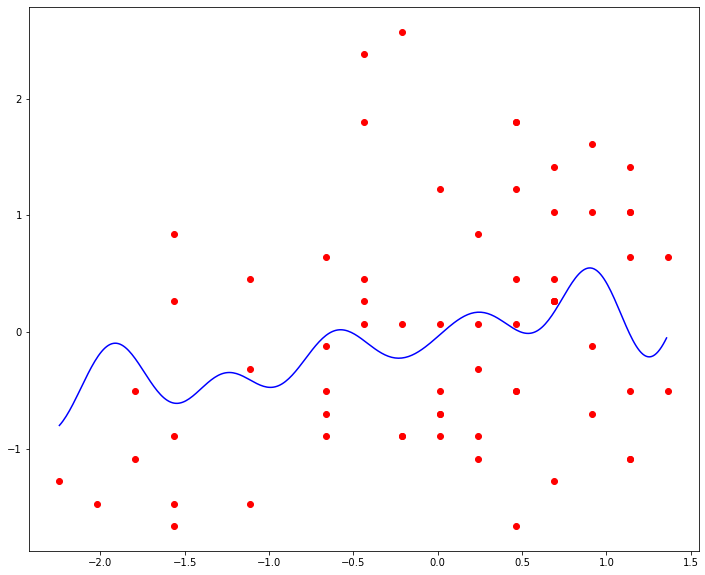

In [16]:
sc_X = StandardScaler()
sc_y = StandardScaler()
svr_x = sc_X.fit_transform(x)
svr_y = sc_y.fit_transform(y)
svr_x_train, svr_x_test, svr_y_train, svr_y_test= train_test_split(svr_x,svr_y, test_size=0.2, random_state=0)
rbf_svrregressor = SVR(kernel = 'rbf', C=100, gamma=3.2, epsilon=0.1) #3.2 gamma is highest r2score. Yty implementing k-fold validation?
rbf_svrregressor.fit(svr_x_train, svr_y_train)
svr_score = rbf_svrregressor.score(svr_x_test,svr_y_test)
y_pred = rbf_svrregressor.predict(svr_x_test) #Predict Start
y_pred = sc_y.inverse_transform(y_pred) #Predict End

Model_score = rbf_svrregressor.score(svr_x_test,svr_y_test)
R2_score = r2_score(y_test,y_pred) #Same as Model_Score
Mean_sqrd_err = mean_squared_error(svr_y_test,y_pred)
Root_mn_sqrd_err = np.sqrt(mean_squared_error(svr_y_test,y_pred))
print('Model Score: ', Model_score)
print('R2 Score: ', R2_score)
print('Mean Squared Error: ', Mean_sqrd_err)
print('Root Mean Squared Error: ', Root_mn_sqrd_err)
export_graphviz(treeregressor, out_file ='decisiontree.dot') 

# create model
model = rbf_svrregressor
# evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(absolute(scores)), std(scores)))

X_grid = np.arange(min(svr_x_test), max(svr_x_test), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(svr_x_test, svr_y_test, color = 'red')
plt.plot(X_grid, rbf_svrregressor.predict(X_grid), color = 'blue')

plt.show()

C:\Users\Zulu\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.0873499575381611
Accuracy: 3.886 (0.439)


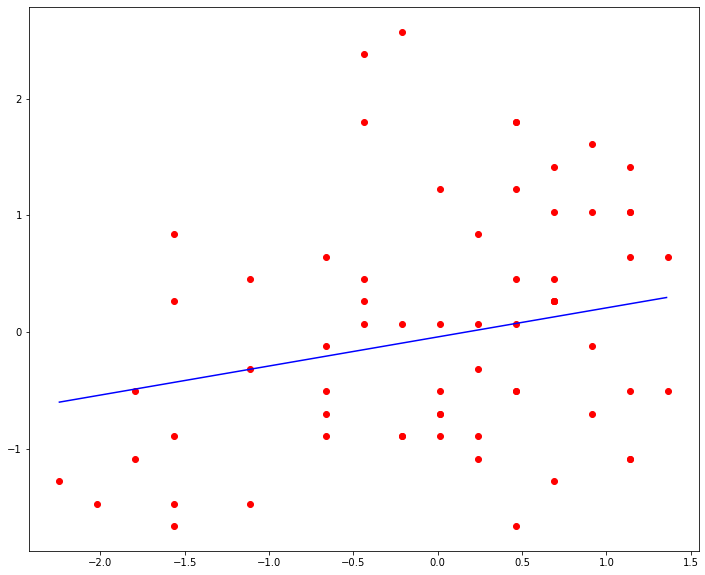

In [17]:
linear_svrregressor = SVR(kernel = 'linear', C=100, gamma=0.1, epsilon=0.1)
linear_svrregressor.fit(svr_x_train, svr_y_train)
svr_score = linear_svrregressor.score(svr_x_test,svr_y_test)
y_pred = linear_svrregressor.predict(svr_x_test) #Predict Start
y_pred = sc_y.inverse_transform(y_pred) #Predict End
print(svr_score)
X_grid = np.arange(min(svr_x_test), max(svr_x_test), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(svr_x_test, svr_y_test, color = 'red')
plt.plot(X_grid, linear_svrregressor.predict(X_grid), color = 'blue')

# create model
model = linear_svrregressor
# evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(absolute(scores)), std(scores)))

In [18]:
# import numpy as np
# import pandas as pd
# import random
# import matplotlib.pyplot as plt
# %matplotlib inline
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 12, 10

# #Define input array with angles from 60deg to 300deg converted to radians
# x = np.array([i*np.pi/180 for i in range(60,300,4)])
# np.random.seed(10)  #Setting seed for reproducibility
# y = np.sin(x) + np.random.normal(0,0.15,len(x))
# data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
# plt.plot(data['x'],data['y'],'.')
# for i in range(2,16):  #power of 1 is already there
#     colname = 'x_%d'%i      #new var will be x_power
#     data[colname] = data['x']**i

In [19]:
# def ridge_regression(data, predictors, alpha, models_to_plot={}):    
#     x_train, x_test, y_train, y_test= train_test_split(data[predictors],data['y'], test_size=0.2, random_state=0)
#     #Fit the model
#     ridgereg = Ridge(alpha=alpha,normalize=True)
#     ridgereg.fit(data[predictors],data['y'])
#     y_pred = ridgereg.predict(data[predictors])
    
#     #Check if a plot is to be made for the entered alpha
#     if alpha in models_to_plot:
#         plt.subplot(models_to_plot[alpha])
#         plt.tight_layout()
#         plt.plot(data['x'],y_pred)
#         plt.plot(data['x'],data['y'],'.')
#         plt.title('Plot for alpha: %.3g'%alpha)
    
#     #Return the result in pre-defined format
#     rss = sum((y_pred-data['y'])**2)
#     ret = [rss]
#     ret.extend([ridgereg.intercept_])
#     ret.extend(ridgereg.coef_)
#     return ret

In [20]:
# #Initialize predictors to be set of 15 powers of x
# predictors=['x']
# predictors.extend(['x_%d'%i for i in range(2,16)])

# #Set the different values of alpha to be tested
# alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

# #Initialize the dataframe for storing coefficients.
# col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
# ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
# coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)
# models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
# for i in range(10):
#     coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)